In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
PATH='/home/andre/PycharmProjects/onos_short_path/parser/'
TXT_FILES_PATH = PATH + 'txtFiles/'
ITG_PATH = '/home/andre/Загрузки/D-ITG-2.8.1-r1023-src/D-ITG-2.8.1-r1023/bin/'

### Отправка пакетов размером 1000 byte с большим rate (10_000_000 pkts/s) в несколько потоков

<img src="assets/1-1_10m-1flow.png" width="600" />

<img src="assets/1-1_10m-2flows.png" width="600" />

<img src="assets/1-1_10m-2flows.png" width="600" />

##### Рост доли потерянных пакетов при увеличении количества потоков

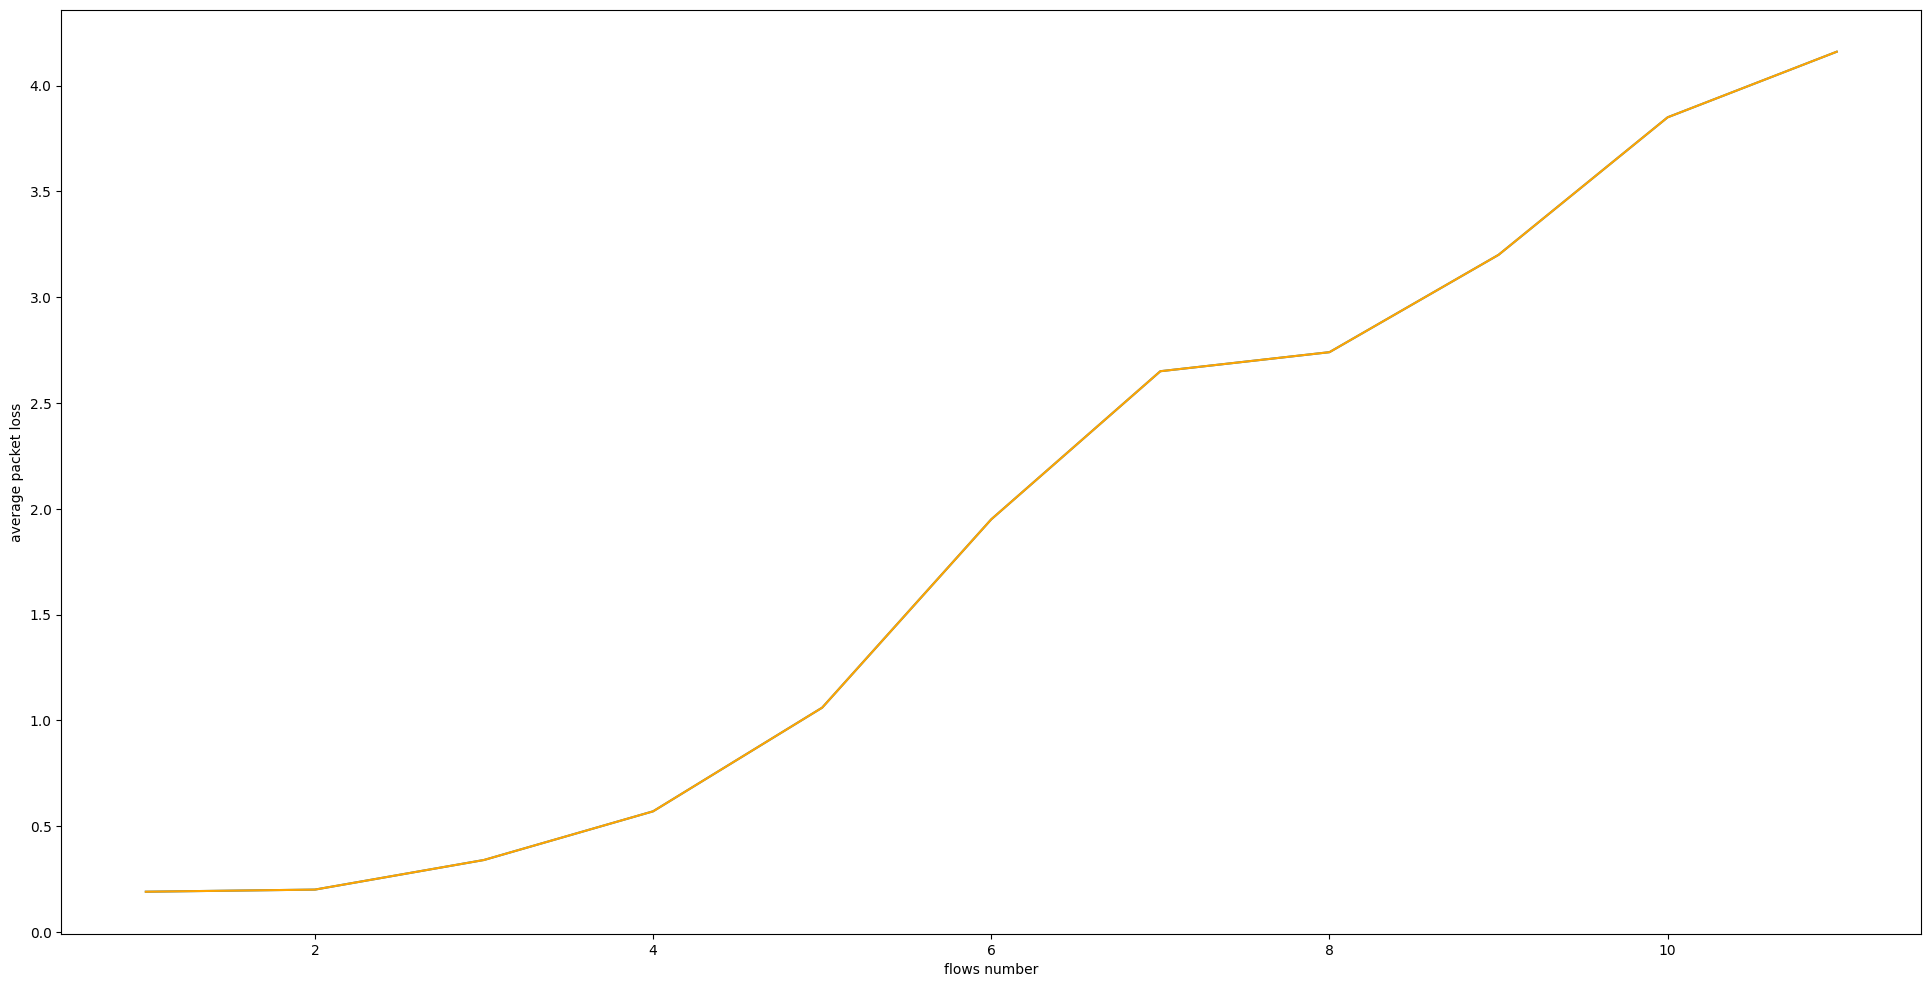

In [16]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
x = [1,2,3,4,5,6,7,8,9,10,11]
y = [0.19, 0.20, 0.34, 0.57, 1.06, 1.95, 2.65, 2.74, 3.20, 3.85, 4.16]
ax.plot(x, y)

ax.set_xlabel('flows number')
ax.set_ylabel('average packet loss')

ax.plot(x, y, color='orange')

plt.show()

#### Определение модели распределения?

### Отправка пакетов с 5 устройств на 1 (порт сохраняется)

#### -c 512 -C 1000 -t 10000

In [19]:
Time = []
with open(TXT_FILES_PATH + 'T.txt', "r") as f:
    for line in f.readlines():
        split_line = line.split()
        Time.append(split_line[0].replace(",", "."))

PL_lists = [[] for x in range(1,6)]
for i in range (2, 5+1):
    with open(TXT_FILES_PATH + f'PL{i}.txt', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            PL_lists[i-1].append(split_line[0].replace(",", "."))
    
df1 = pd.DataFrame({
    "time":Time,
    #"packetLoss1": PL_lists[0],
    "packetLoss2": PL_lists[1],
    "packetLoss3": PL_lists[2],
    "packetLoss4": PL_lists[3],
    "packetLoss5": PL_lists[4],
})
df1.time = df1.time.apply(float)
#df1.packetLoss1 = df1.packetLoss1.apply(float)
df1.packetLoss2 = df1.packetLoss2.apply(float)
df1.packetLoss3 = df1.packetLoss3.apply(float)
df1.packetLoss4 = df1.packetLoss4.apply(float)
df1.packetLoss5 = df1.packetLoss5.apply(float)
df1

,time,packetLoss2,packetLoss3,packetLoss4,packetLoss5
0,0.00,0.0,1.0,0.0,5.0
1,0.01,0.0,0.0,0.0,15.0
2,0.02,0.0,0.0,0.0,0.0
3,0.03,0.0,0.0,0.0,0.0
4,0.04,0.0,0.0,1.0,0.0
...,...,...,...,...,...
995,9.95,89.0,3.0,7.0,7.0
996,9.96,1.0,15.0,0.0,0.0
997,9.97,0.0,1.0,0.0,220.0
998,9.98,0.0,0.0,0.0,11.0


<img src="assets/2-to-1.png" width="600" />

<img src="assets/3-to-1.png" width="600" />

<img src="assets/4-to-1.png" width="600" />

<img src="assets/5-to-1.png" width="600" />

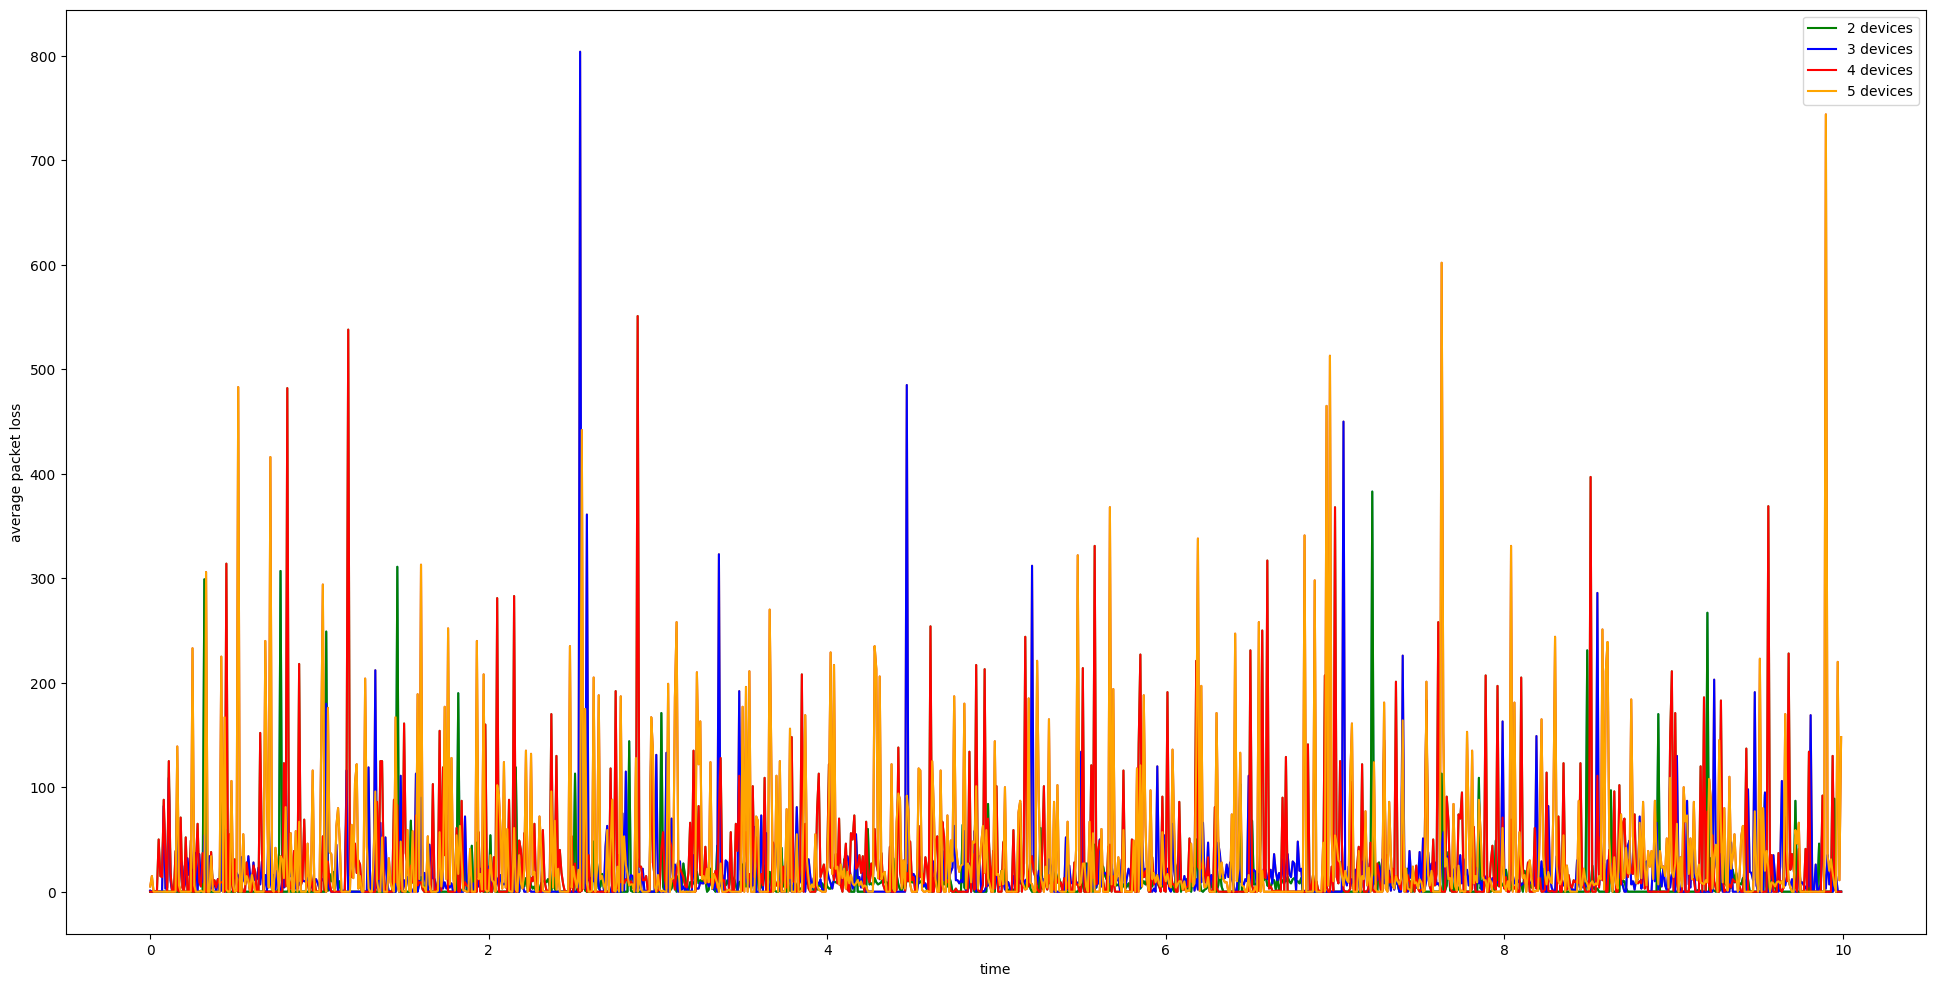

In [21]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
x = df1['time']
#y1 = df1['packetLoss1']
y2 = df1['packetLoss2']
y3 = df1['packetLoss3']
y4 = df1['packetLoss4']
y5 = df1['packetLoss5']
#ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x, y3)
ax.plot(x, y4)
ax.plot(x, y5)

ax.set_xlabel('time')
ax.set_ylabel('average packet loss')

#ax.plot(x, y4, label = '4 devices', color='red')
ax.plot(x, y2, label = '2 devices', color='green')
ax.plot(x, y3, label = '3 devices', color='blue')
ax.plot(x, y4, label = '4 devices', color='red')
ax.plot(x, y5, label = '5 devices', color='orange')
ax.legend()

plt.show()

#### Причина многократного роста Packet loss при отправки пакетов с разных устройств?

# All-to-all case

In [210]:
# number of hosts in topology
nodes_num = 15
# push average packet loss to file every <PT> milliseconds
PT = 100

In [211]:
# creating .dat files with packet losses every PT ms 
for i in range(nodes_num):
    os.system(f'cd {ITG_PATH} && ./ITGDec recv_all_{i+1}.log -p {PT} packetloss{i+1}.dat');

|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

limit_output extension: Maximum message size of 10048 exceeded with 234278 characters

In [212]:
time = []
recv_data = [[] for _ in range(nodes_num)]
# parsing packetloss{i}.dat files from each receiver 
for i in range(nodes_num):
    with open(ITG_PATH + f'packetloss{i+1}.dat', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            time.append(split_line[0].replace(",", "."))
#             if len(split_line) != nodes_num+1:
#                 i += 1
#             else:
#                 recv_data[i].append(split_line[-1].replace(",", "."))
            recv_data[i].append(split_line[-1].replace(",", "."))
                
print(len(time))
for i in recv_data:
    print(len(i))

9035
602
603
603
603
602
603
602
602
603
602
602
602
602
602
602


In [213]:
# find smallest column for alignment dataframe 
# in case of different length of packetloss files
def get_smallest_column(recv_data):
    col_len = len(recv_data[0])
    for i in range(1, nodes_num):
        cur_col_len = len(recv_data[i])
        if cur_col_len < col_len and cur_col_len != 0:
            col_len = cur_col_len
    return col_len
            
col_len = get_smallest_column(recv_data)
print(f'column length for alignment: {col_len}')
            
# dataframe with time and receiver's packet losses
pl_df = pd.DataFrame({
    "time":time[:col_len],
})

# insert <nodes_num> columns in daraframe 
j = 0
for i in range(nodes_num):
    if len(recv_data[i]) == 0:
        continue
    j += 1
    pl_df.insert(j, f"packetloss{i+1}", recv_data[i][:col_len])
    
# drop first row with additional info
pl_df.drop(index=pl_df.index[0], axis=0, inplace= True)
# make float values in all columns
pl_df = pl_df.astype(float)

pl_df

column length for alignment: 602


,time,packetloss1,packetloss2,packetloss3,packetloss4,packetloss5,packetloss6,packetloss7,packetloss8,packetloss9,packetloss10,packetloss11,packetloss12,packetloss13,packetloss14,packetloss15
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,1.0,30.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0
4,0.3,0.0,12.0,1.0,1.0,2.0,0.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0
5,0.4,2.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,59.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
598,59.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
599,59.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
600,59.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [214]:
for i in range(nodes_num):
    os.system(f'cd {ITG_PATH} && ./ITGDec recv_all_{i+1}.log -l recv{i+1}.txt')

|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

limit_output extension: Maximum message size of 10048 exceeded with 192524 characters

In [215]:
pl = []
received_pkts = []
dropped_pkts = []
for i in range(nodes_num):
    map_count = {}
    map_max = {}
    with open(ITG_PATH + f'recv{i+1}.txt', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            src_socket = split_line[4]
            addr_index = src_socket.index("/")
            src_addr = src_socket[:addr_index]
            if src_addr not in map_count:
                map_count[src_addr] = 0
                map_max[src_addr] = 0
            map_count[src_addr] += 1
            if int(split_line[2]) > map_max[src_addr]:
                map_max[src_addr] = int(split_line[2])
                
    num_received_pkts = sum(map_count.values())
    maximums = sum(map_max.values())
    received_pkts.append(num_received_pkts)
    
    sum_rec = 0
    for i in map_max:
        if map_max[i] - map_count[i] < 0:
            continue
        sum_rec += map_max[i] - map_count[i]
    dropped_pkts.append(sum_rec)        
    pl.append(round(sum_rec / (sum_rec + num_received_pkts) * 100, 2))
    
    #dropped_pkts.append(maximums - num_received_pkts)
    #pl.append(round((1 - num_received_pkts / maximums) * 100, 2))
    
    
print(f'received pkts: {received_pkts}')
print(f'dropped_pkts: {dropped_pkts}; total: {sum(dropped_pkts)}')
total_pkts_num = 0
for i in received_pkts:
    total_pkts_num += i

print("total_pkts_num: ", total_pkts_num)
pkt_size = 7500
modeling_time = 60
print(f"throughput: {total_pkts_num / modeling_time * pkt_size / 125_000} Mbts/s \n")

print(f'Packetloss for each receiver: {pl}')
print(f'Total packetloss: {round((sum(dropped_pkts) / (total_pkts_num + sum(dropped_pkts))) * 100, 5)} %')

received pkts: [608279, 608439, 612330, 605227, 614633, 603066, 616105, 608103, 607337, 608442, 613364, 616341, 611479, 607611, 606014]
dropped_pkts: [551, 1188, 221, 718, 1666, 927, 350, 2604, 552, 906, 885, 2227, 531, 497, 710]; total: 14533
total_pkts_num:  9146770
throughput: 9146.77 Mbts/s 

Packetloss for each receiver: [0.09, 0.19, 0.04, 0.12, 0.27, 0.15, 0.06, 0.43, 0.09, 0.15, 0.14, 0.36, 0.09, 0.08, 0.12]
Total packetloss: 0.15863 %


In [205]:
map_count = {}
map_max = {}
with open(ITG_PATH + f'recv{1}.txt', "r") as f:
    for line in f.readlines():
        split_line = line.split()
        src_socket = split_line[4]
        addr_index = src_socket.index("/")
        src_addr = src_socket[:addr_index]
        if src_addr not in map_count:
            map_count[src_addr] = 0
            map_max[src_addr] = 0
        map_count[src_addr] += 1
        if int(split_line[2]) > map_max[src_addr]:
            map_max[src_addr] = int(split_line[2])
#received_pkts.append(sum(map_count.values()))
#dropped_pkts.append(sum(map_max.values()) - sum(map_count.values()))
#pl.append(round((1 - sum(map_count.values()) / sum(map_max.values())) * 100, 2))

print(map_count)
print()
print(map_max)
print()
sum_rec = 0
for i in map_max:
    sum_rec += map_max[i] - map_count[i]
    print(f'{i}: {map_max[i] - map_count[i]}')
print(sum_rec)

{'192.168.0.2': 43707, '192.168.0.5': 48982, '192.168.0.3': 44197, '192.168.0.12': 47094, '192.168.0.11': 43684, '192.168.0.4': 45458, '192.168.0.9': 44874, '192.168.0.15': 45427, '192.168.0.13': 45280, '192.168.0.14': 45462, '192.168.0.10': 44350, '192.168.0.7': 45100, '192.168.0.6': 44150, '192.168.0.8': 45250}

{'192.168.0.2': 43719, '192.168.0.5': 49002, '192.168.0.3': 44200, '192.168.0.12': 47100, '192.168.0.11': 43688, '192.168.0.4': 45477, '192.168.0.9': 44914, '192.168.0.15': 45450, '192.168.0.13': 45300, '192.168.0.14': 45497, '192.168.0.10': 44350, '192.168.0.7': 45118, '192.168.0.6': 44169, '192.168.0.8': 45259}

192.168.0.2: 12
192.168.0.5: 20
192.168.0.3: 3
192.168.0.12: 6
192.168.0.11: 4
192.168.0.4: 19
192.168.0.9: 40
192.168.0.15: 23
192.168.0.13: 20
192.168.0.14: 35
192.168.0.10: 0
192.168.0.7: 18
192.168.0.6: 19
192.168.0.8: 9
228


In [50]:
map_count = {}
map_max = {}
nums = []
addrs = []
with open(ITG_PATH + f'recv{5}.txt', "r") as f:
    for line in f.readlines():
        split_line = line.split()
        src_socket = split_line[4]
        addr_index = src_socket.index("/")
        src_addr = src_socket[:addr_index]
        
        nums.append(int(split_line[2]))
        addrs.append(src_addr)

pl_df = pd.DataFrame({'pkt_num':nums, 'addr':addrs})
pl_df

,pkt_num,addr
0,1,192.168.0.7
1,2,192.168.0.7
2,3,192.168.0.7
3,4,192.168.0.7
4,5,192.168.0.7
...,...,...
32536,2987,192.168.0.12
32537,2988,192.168.0.12
32538,2989,192.168.0.12
32539,2990,192.168.0.12


In [51]:
for i in range(1,16):
    kk = pl_df.loc[(pl_df['addr'] == f'192.168.0.{i}')]
    duplicateRows = kk[kk.duplicated(['pkt_num'])]
    a = f'192.168.0.{i}'
    print(a, len(pl_df.query(f"addr == '192.168.0.{i}'")), len(duplicateRows))

192.168.0.1 2800 0
192.168.0.2 2900 0
192.168.0.3 2650 0
192.168.0.4 2500 0
192.168.0.5 0 0
192.168.0.6 2850 0
192.168.0.7 2900 0
192.168.0.8 2100 0
192.168.0.9 0 0
192.168.0.10 2900 0
192.168.0.11 2700 0
192.168.0.12 2991 0
192.168.0.13 0 0
192.168.0.14 2350 0
192.168.0.15 2900 0


In [124]:
kk = pl_df.loc[(pl_df['addr'] == f'192.168.0.14')]
duplicateRows = kk[kk.duplicated(['pkt_num'])]
duplicateRows

,pkt_num,addr
39169,1884,192.168.0.14
39170,1885,192.168.0.14
39171,1886,192.168.0.14
39172,1887,192.168.0.14
39173,1888,192.168.0.14
...,...,...
54774,2660,192.168.0.14
54775,2661,192.168.0.14
54776,2662,192.168.0.14
54777,2663,192.168.0.14


In [126]:
pl_df.loc[(pl_df['addr'] == '192.168.0.14') & (pl_df['pkt_num'] == 2664)]

,pkt_num,addr
53022,2664,192.168.0.14
53699,2664,192.168.0.14
54134,2664,192.168.0.14
54778,2664,192.168.0.14


In [127]:
pl_df_copy = pl_df.drop_duplicates(keep='first')
pl_df_copy

,pkt_num,addr
0,1,192.168.0.6
1,2,192.168.0.6
2,3,192.168.0.6
3,4,192.168.0.6
4,5,192.168.0.6
...,...,...
55987,3825,192.168.0.4
55988,3826,192.168.0.4
55989,3827,192.168.0.4
55990,3828,192.168.0.4


In [128]:
for i in range(1,16):
    kk = pl_df_copy.loc[(pl_df_copy['addr'] == f'192.168.0.{i}')]
    duplicateRows = kk[kk.duplicated(['pkt_num'])]
    a = f'192.168.0.{i}'
    print(a, len(pl_df_copy.query(f"addr == '192.168.0.{i}'")), len(duplicateRows))

192.168.0.1 6480 0
192.168.0.2 4083 0
192.168.0.3 4310 0
192.168.0.4 3663 0
192.168.0.5 0 0
192.168.0.6 5205 0
192.168.0.7 4314 0
192.168.0.8 4157 0
192.168.0.9 3150 0
192.168.0.10 3811 0
192.168.0.11 2552 0
192.168.0.12 3270 0
192.168.0.13 2453 0
192.168.0.14 2572 0
192.168.0.15 4017 0


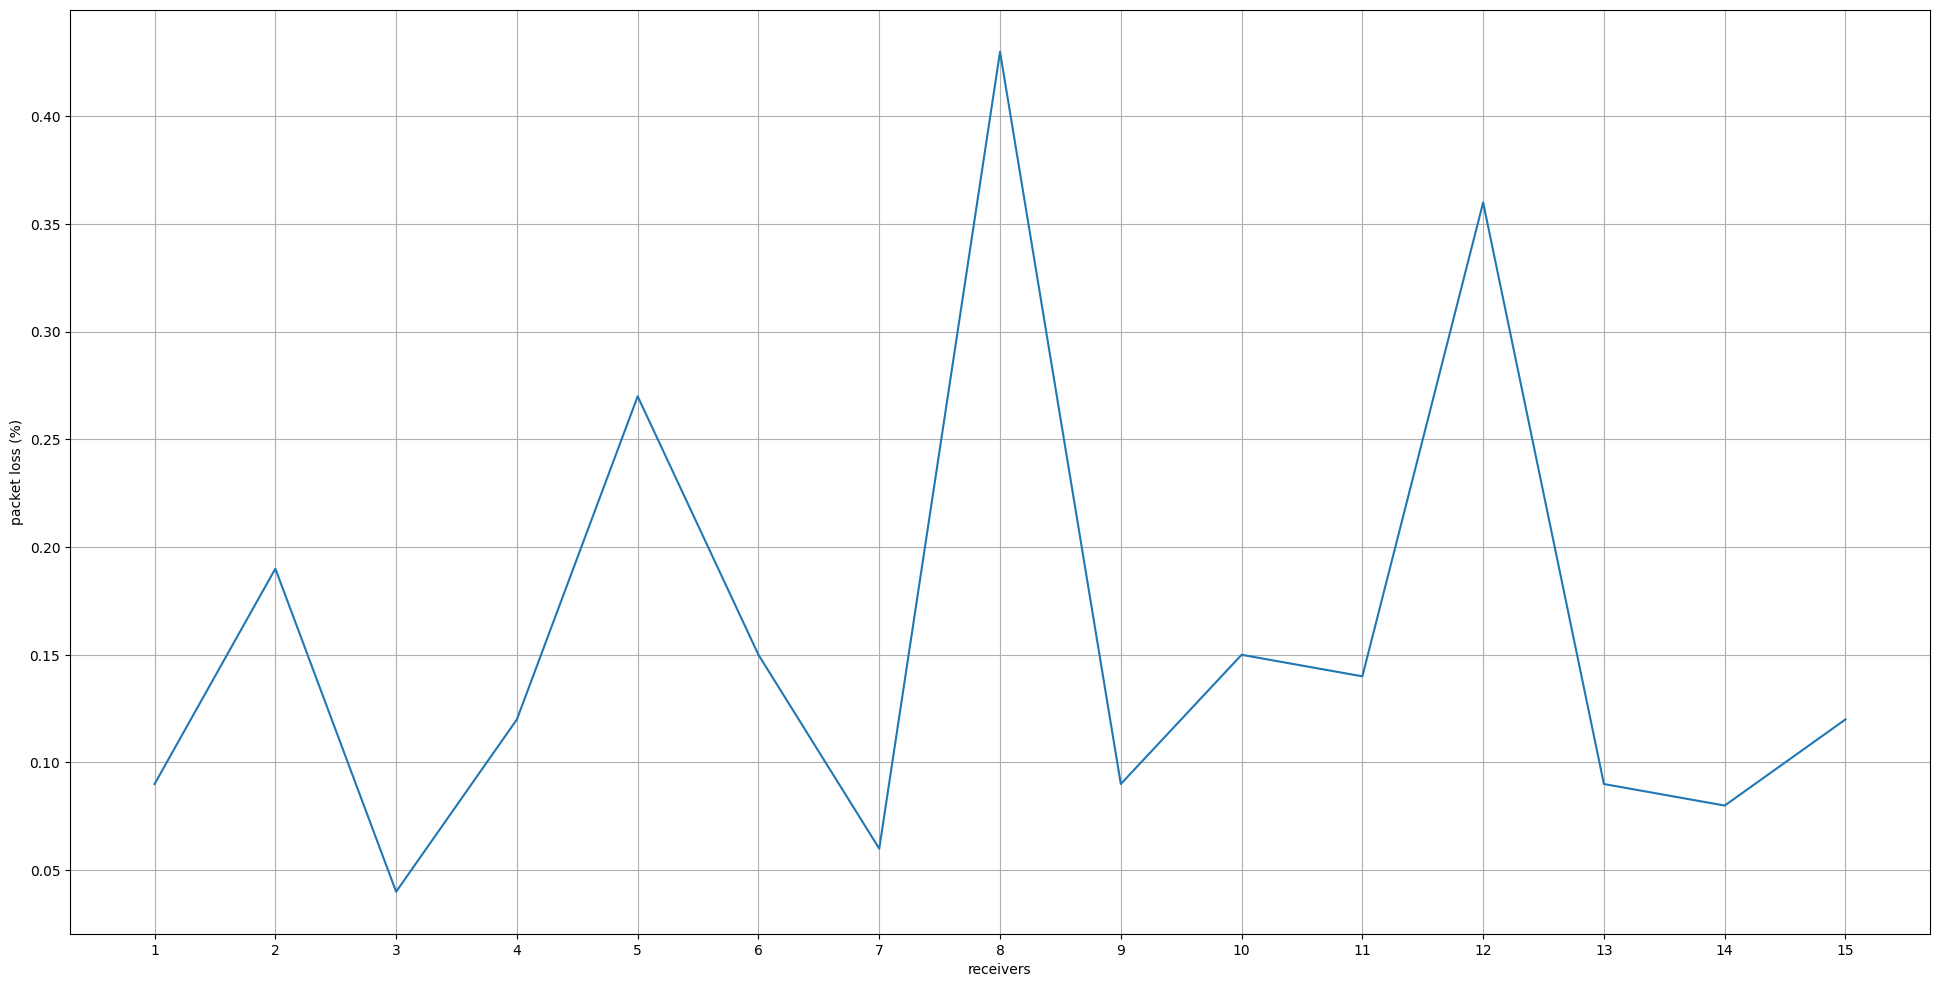

In [229]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
ax.plot([x for x in range(1, nodes_num+1)], pl)

ax.set_xlabel('receivers')
ax.grid()
ax.set_ylabel('packet loss (%)')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

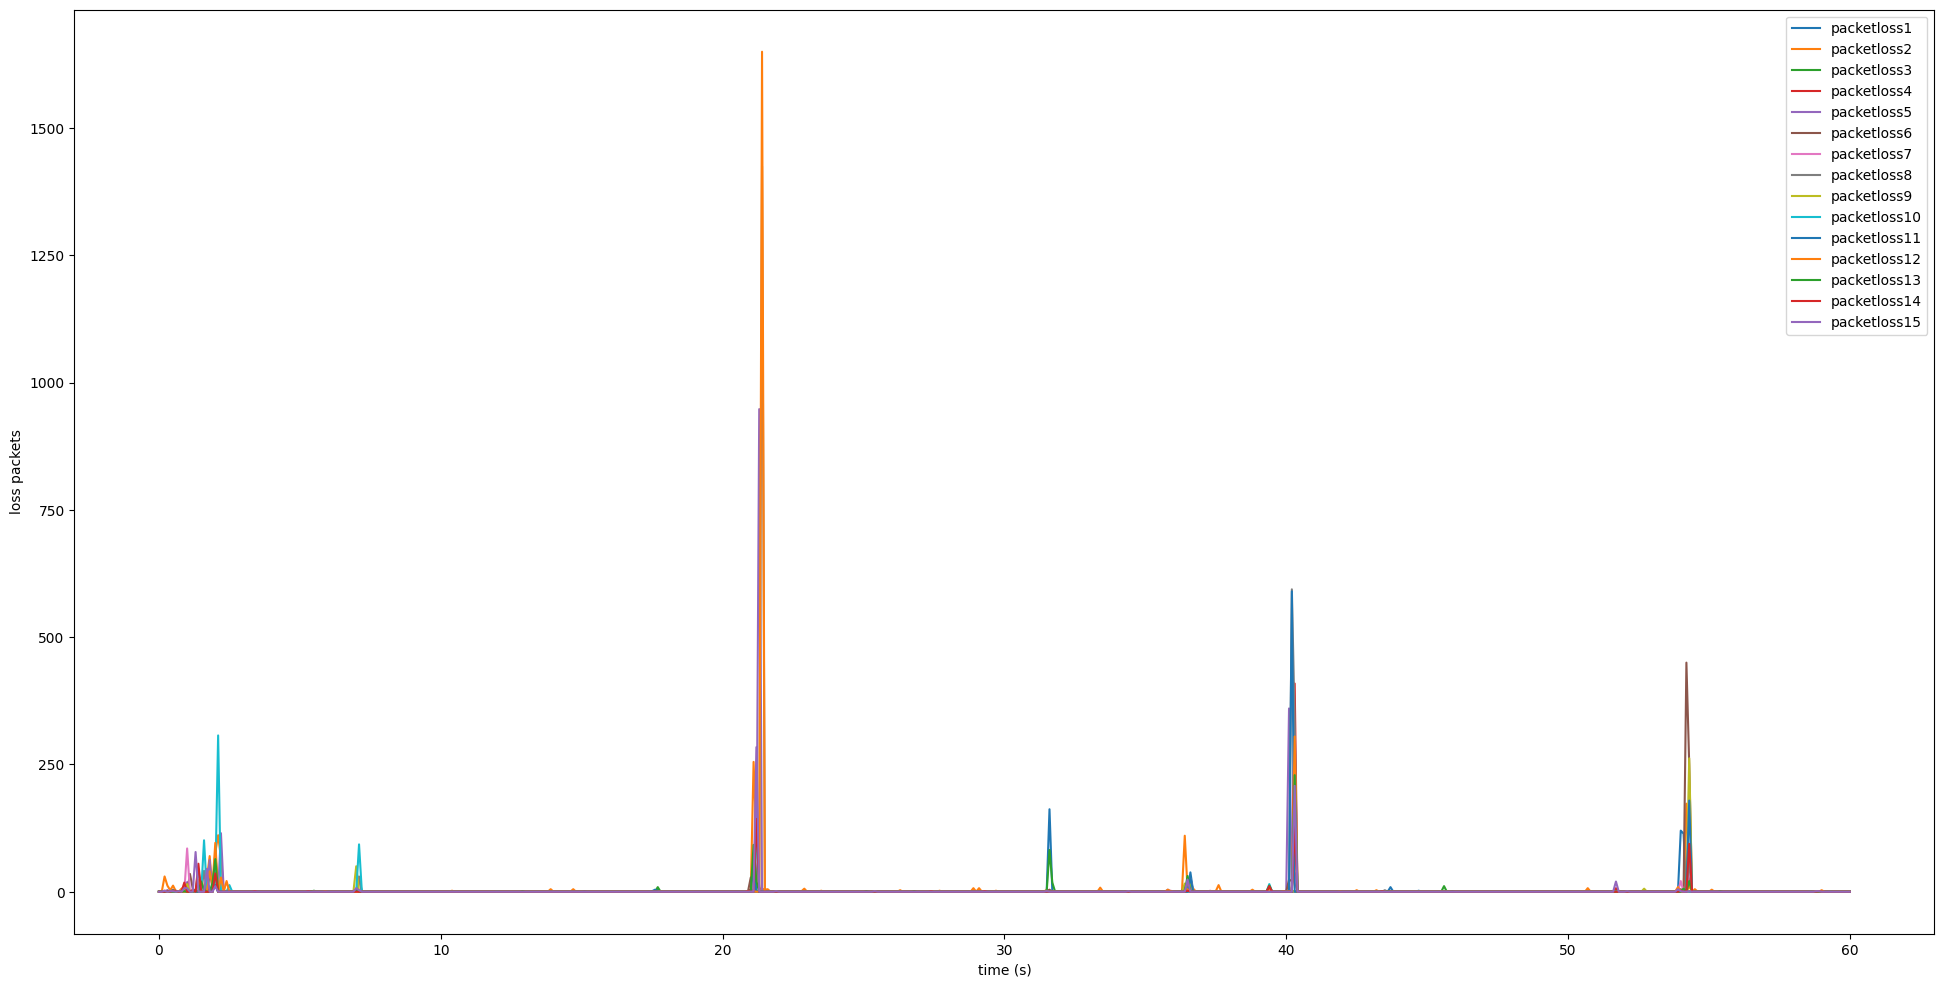

In [230]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
ax.plot(pl_df['time'], pl_df.iloc[:col_len, 1:nodes_num+1])

ax.legend(pl_df.iloc[:col_len, 1:nodes_num+1])
ax.set_xlabel('time (s)')
ax.set_ylabel('loss packets')

plt.show()

In [231]:
modeling_time = 60
plhist = []
plhist
step = 5
for j in np.arange(0, modeling_time, step):
    s = 0
    for i in range(1, nodes_num):
        if j != modeling_time - step:
            s += len(pl_df.query(f"time >= {j} and time <= {j+step} and packetloss{i} > 0.0"))
        else:
            s += len(pl_df.query(f"time >= {j} and packetloss{i} > 0.0"))
    plhist.append(s)
print(plhist)
df = pd.DataFrame({
    'time': [x for x in np.arange(step,modeling_time+step,step)],
    'pkts': plhist
    })

[121, 13, 8, 10, 27, 12, 15, 39, 37, 5, 37, 12]


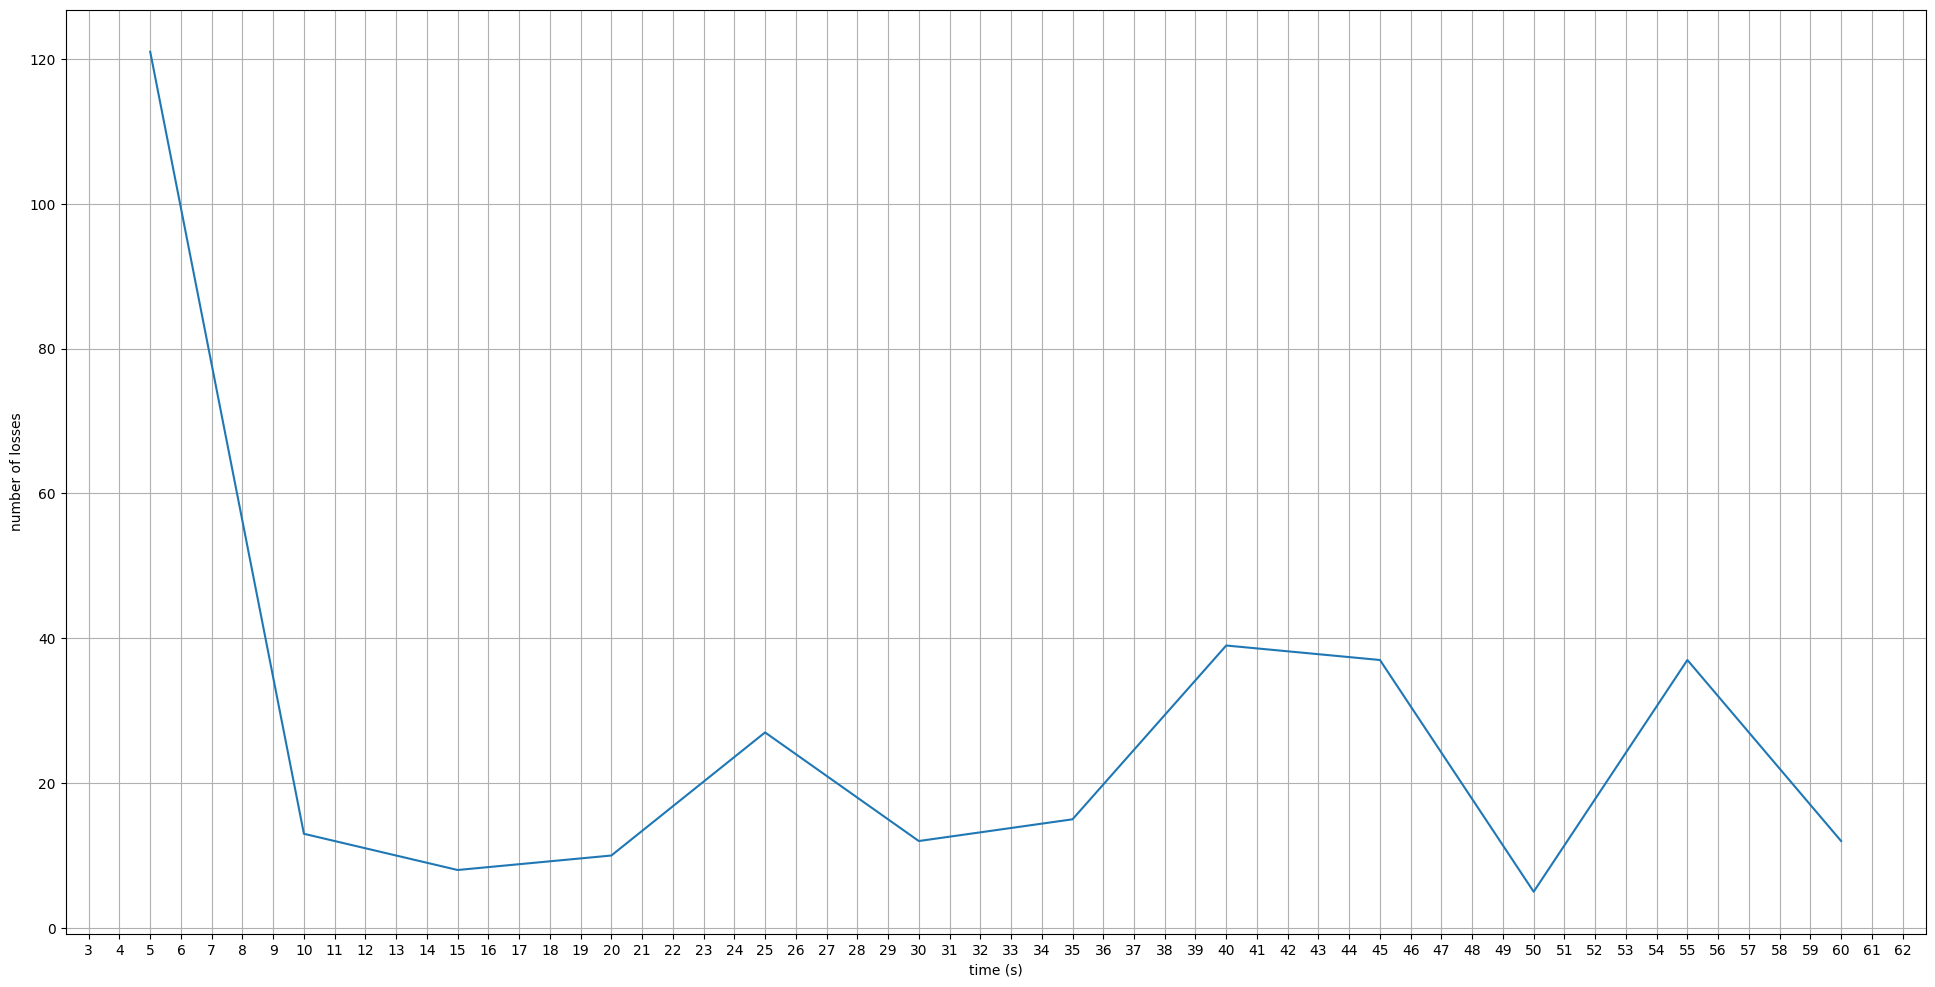

In [232]:
import matplotlib.ticker as ticker
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
# ax.scatter(df['time'], plhist)
ax.plot(df['time'], plhist)

ax.set_xlabel('time (s)')
ax.grid()
ax.set_ylabel('number of losses')

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

In [234]:
modeling_time = 60
plhist = []
plhist
step = 5
for j in np.arange(0, modeling_time, step):
    s = 0
    for i in range(1, nodes_num):
        if j != modeling_time - step:
            s += pl_df.loc[(pl_df['time'] >= j) & (pl_df['time'] <= j+step), f'packetloss{i}'].sum()
        else:
            s += pl_df.loc[pl_df['time'] >= j, f'packetloss{i}'].sum()
    plhist.append(s)
print(f'{plhist}; total: {sum(plhist)}')
df = pd.DataFrame({
    'time': [x for x in np.arange(step,modeling_time+step,step)],
    'pkts': plhist
    })

[2171.0, 211.0, 17.0, 24.0, 5313.0, 28.0, 288.0, 480.0, 3312.0, 15.0, 2047.0, 17.0]; total: 13923.0


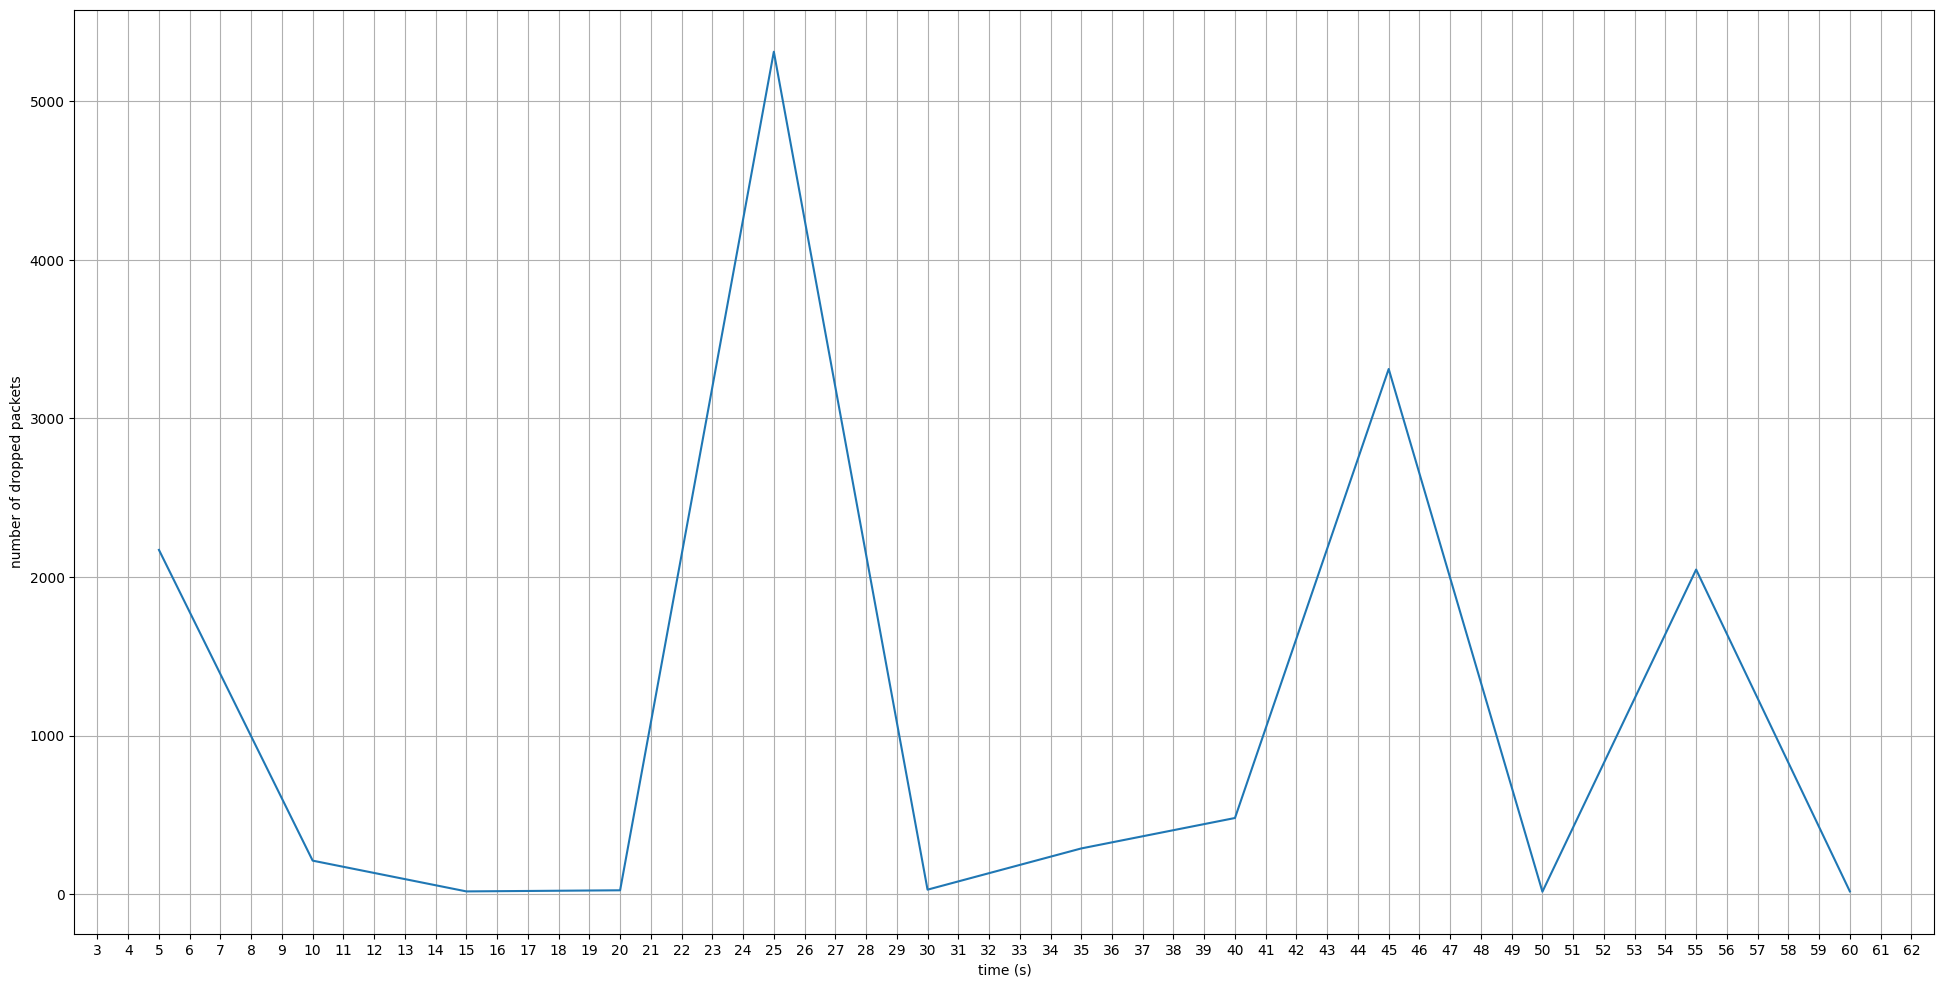

In [235]:
import matplotlib.ticker as ticker
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
# ax.scatter(df['time'], plhist)
ax.plot(df['time'], plhist)

ax.set_xlabel('time (s)')
ax.grid()
ax.set_ylabel('number of dropped packets')

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

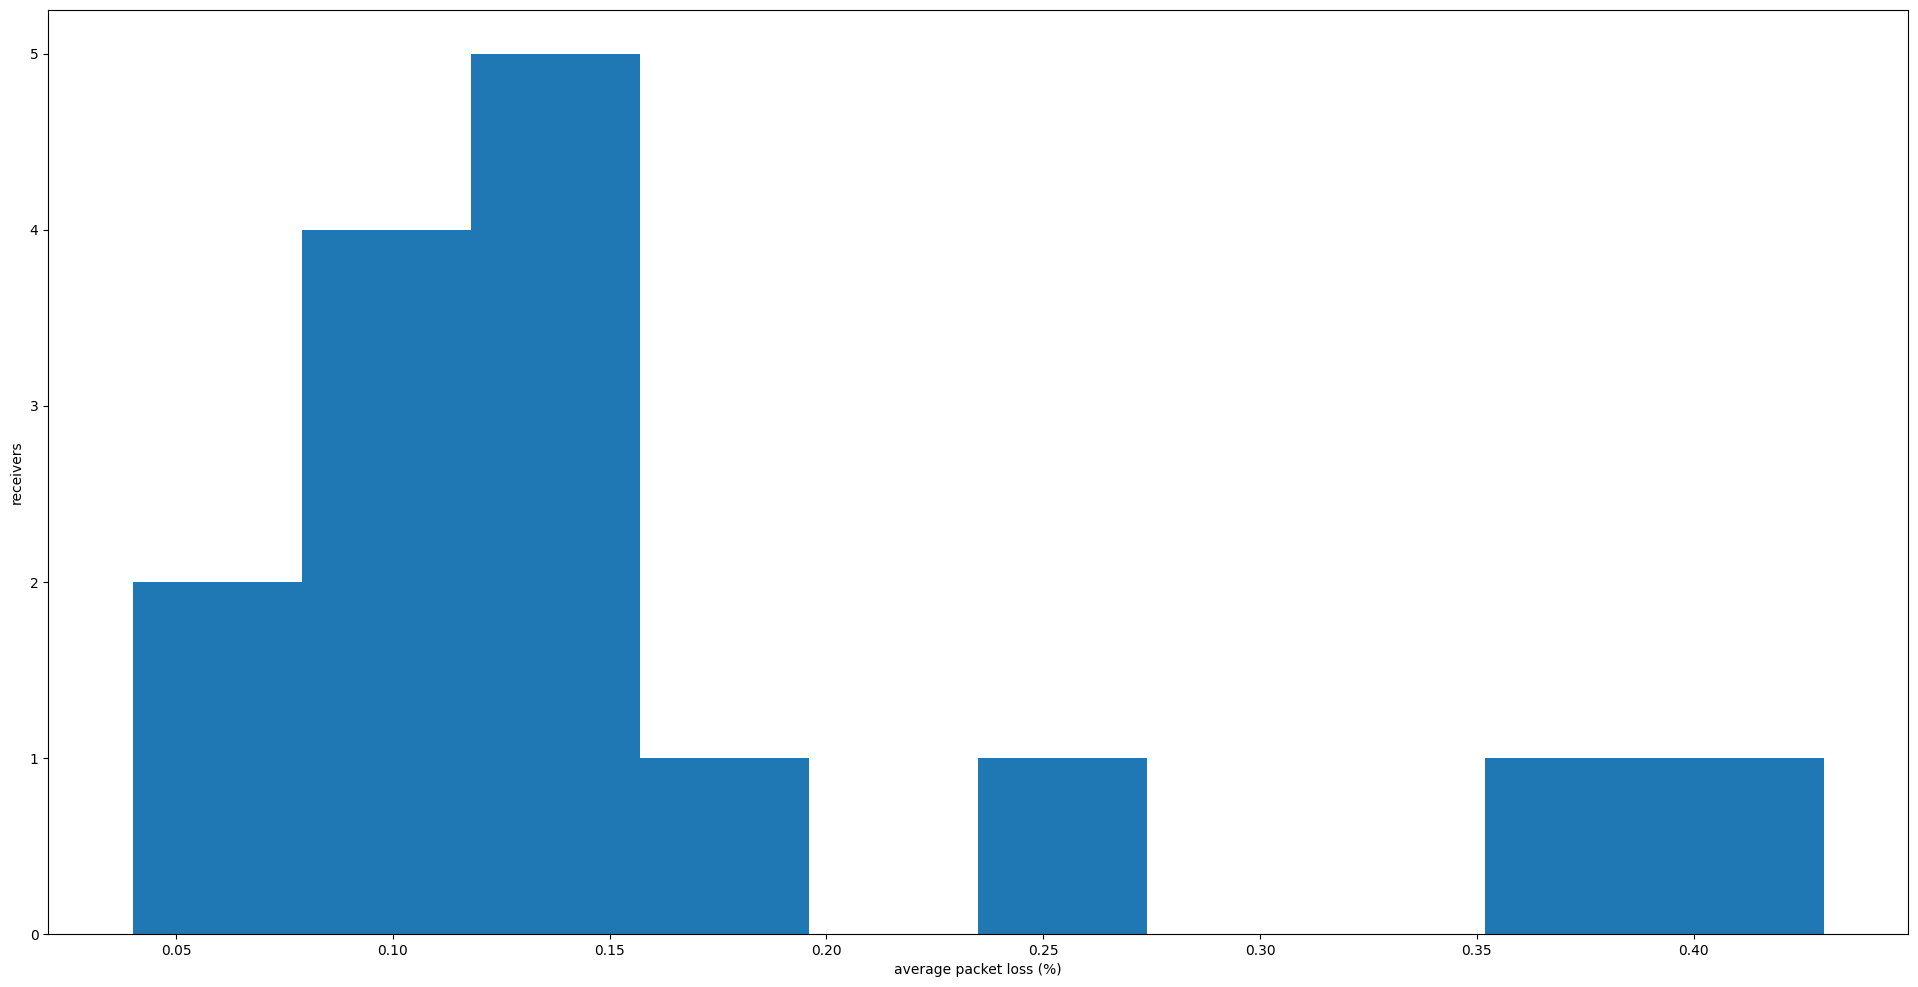

In [236]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
ax.hist(pl)

ax.set_xlabel('average packet loss (%)')
ax.set_ylabel('receivers')

plt.show()

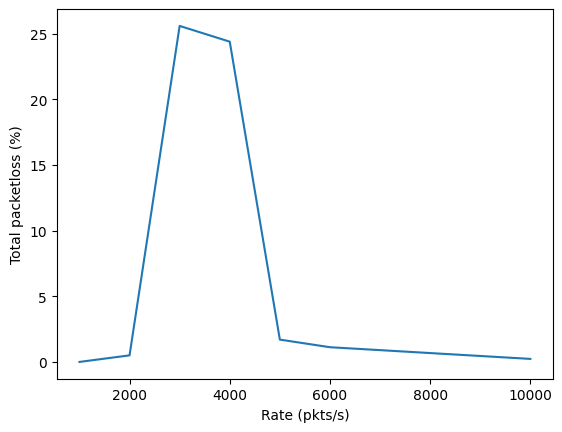

In [237]:
y = [0.0,0.5,25.6,24.4,1.7,1.12,0.23]
x = [1000,2000,3000,4000,5000,6000,10_000]

_, ax = plt.subplots( ncols=1)
ax.plot(x, y)

ax.set_xlabel('Rate (pkts/s)')
ax.set_ylabel('Total packetloss (%)')

plt.show()

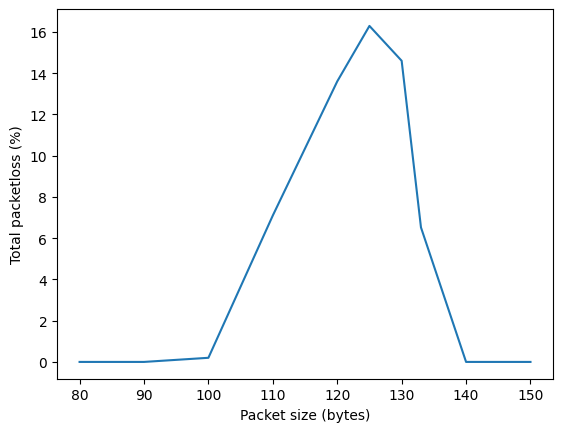

In [93]:
y = [0.0,0.0,0.2,7.1,13.6,16.29,14.6,6.52,0.0,0.0]
x = [80,90,100,110,120,125,130,133,140,150]

_, ax = plt.subplots( ncols=1)
ax.plot(x, y)

ax.set_xlabel('Packet size (bytes)')
ax.set_ylabel('Total packetloss (%)')

plt.show()

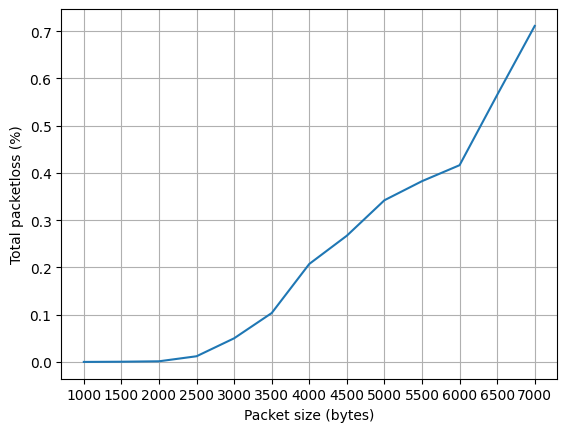

In [242]:
y = [0.0,0.00042,0.00134,0.01199,0.05,0.10344,0.20733,0.26713,0.34215,0.38253,0.41633,0.56498,0.71105]
x = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000]

_, ax = plt.subplots( ncols=1)
ax.plot(x, y)

ax.set_xlabel('Packet size (bytes)')
ax.grid()
ax.set_ylabel('Total packetloss (%)')

ax.xaxis.set_major_locator(ticker.MultipleLocator(500))

plt.show()

# Custom case

In [89]:
# number of hosts in topology
nodes_num = 6
# push average packet loss to file every <PT> milliseconds
PT = 100

In [90]:
# creating .dat files with packet losses every PT ms 
for i in range(nodes_num):
    os.system(f'cd {ITG_PATH} && ./ITGDec recv{i+1}.log -p {PT} packetloss{i+1}.dat')

|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

limit_output extension: Maximum message size of 10048 exceeded with 277484 characters

In [91]:
time = []
recv_data = [[] for _ in range(nodes_num)]
# parsing packetloss{i}.dat files from each receiver 
for i in range(nodes_num):
    with open(ITG_PATH + f'packetloss{i+1}.dat', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            time.append(split_line[0].replace(",", "."))
#             if len(split_line) != nodes_num+1:
#                 i += 1
#             else:
#                 recv_data[i].append(split_line[-1].replace(",", "."))
            recv_data[i].append(split_line[-1].replace(",", "."))
                
print(len(time))
for i in recv_data:
    print(len(i))

3621
603
604
604
604
603
603


In [92]:
# find smallest column for alignment dataframe 
# in case of different length of packetloss files
def get_smallest_column(recv_data):
    col_len = len(recv_data[0])
    for i in range(1, nodes_num):
        cur_col_len = len(recv_data[i])
        if cur_col_len < col_len and cur_col_len != 0:
            col_len = cur_col_len
    return col_len
            
col_len = get_smallest_column(recv_data)
print(f'column length for alignment: {col_len}')
            
# dataframe with time and receiver's packet losses
pl_df = pd.DataFrame({
    "time":time[:col_len],
})

# insert <nodes_num> columns in daraframe 
j = 0
for i in range(nodes_num):
    if len(recv_data[i]) == 0:
        continue
    j += 1
    pl_df.insert(j, f"packetloss{i+1}", recv_data[i][:col_len])
    
# drop first row with additional info
pl_df.drop(index=pl_df.index[0], axis=0, inplace= True)
# make float values in all columns
pl_df = pl_df.astype(float)

pl_df

column length for alignment: 603


,time,packetloss1,packetloss2,packetloss3,packetloss4,packetloss5,packetloss6
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.1,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,0.0,0.0,0.0,0.0,0.0,0.0
4,0.3,0.0,0.0,0.0,0.0,0.0,0.0
5,0.4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
598,59.7,0.0,0.0,0.0,0.0,0.0,0.0
599,59.8,0.0,0.0,0.0,0.0,0.0,0.0
600,59.9,0.0,0.0,0.0,0.0,0.0,0.0
601,60.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
for i in range(nodes_num):
    os.system(f'cd {ITG_PATH} && ./ITGDec recv{i+1}.log -l recv{i+1}.txt')

|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

limit_output extension: Maximum message size of 10048 exceeded with 111020 characters

In [94]:
pl = []
received_pkts = []
dropped_pkts = []
for i in range(nodes_num):
    map_count = {}
    map_max = {}
    with open(ITG_PATH + f'recv{i+1}.txt', "r") as f:
        for line in f.readlines():
            split_line = line.split()
            src_socket = split_line[4]
            addr_index = src_socket.index("/")
            src_addr = src_socket[:addr_index]
            if src_addr not in map_count:
                map_count[src_addr] = 0
                map_max[src_addr] = 0
            map_count[src_addr] += 1
            if int(split_line[2]) > map_max[src_addr]:
                map_max[src_addr] = int(split_line[2])
                
    num_received_pkts = sum(map_count.values())
    maximums = sum(map_max.values())
    received_pkts.append(num_received_pkts)
    
    sum_rec = 0
    for i in map_max:
        if map_max[i] - map_count[i] < 0:
            continue
        sum_rec += map_max[i] - map_count[i]
    dropped_pkts.append(sum_rec)        
    pl.append(round(sum_rec / (sum_rec + num_received_pkts) * 100, 2))
    
    #dropped_pkts.append(maximums - num_received_pkts)
    #pl.append(round((1 - num_received_pkts / maximums) * 100, 2))
    
    
print(f'received pkts: {received_pkts}')
print(f'dropped_pkts: {dropped_pkts}; total: {sum(dropped_pkts)}')
total_pkts_num = 0
for i in received_pkts:
    total_pkts_num += i

print("total_pkts_num: ", total_pkts_num)
pkt_size = 2000
modeling_time = 60
print(f"throughput: {total_pkts_num / modeling_time * pkt_size / 125_000} Mbts/s \n")

print(f'Packetloss for each receiver: {pl}')
print(f'Total packetloss: {round((sum(dropped_pkts) / (total_pkts_num + sum(dropped_pkts))) * 100, 2)} %')

received pkts: [138742, 138889, 138832, 138817, 112535, 112462]
dropped_pkts: [0, 0, 0, 0, 0, 0]; total: 0
total_pkts_num:  780277
throughput: 208.07386666666665 Mbts/s 

Packetloss for each receiver: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Total packetloss: 0.0 %


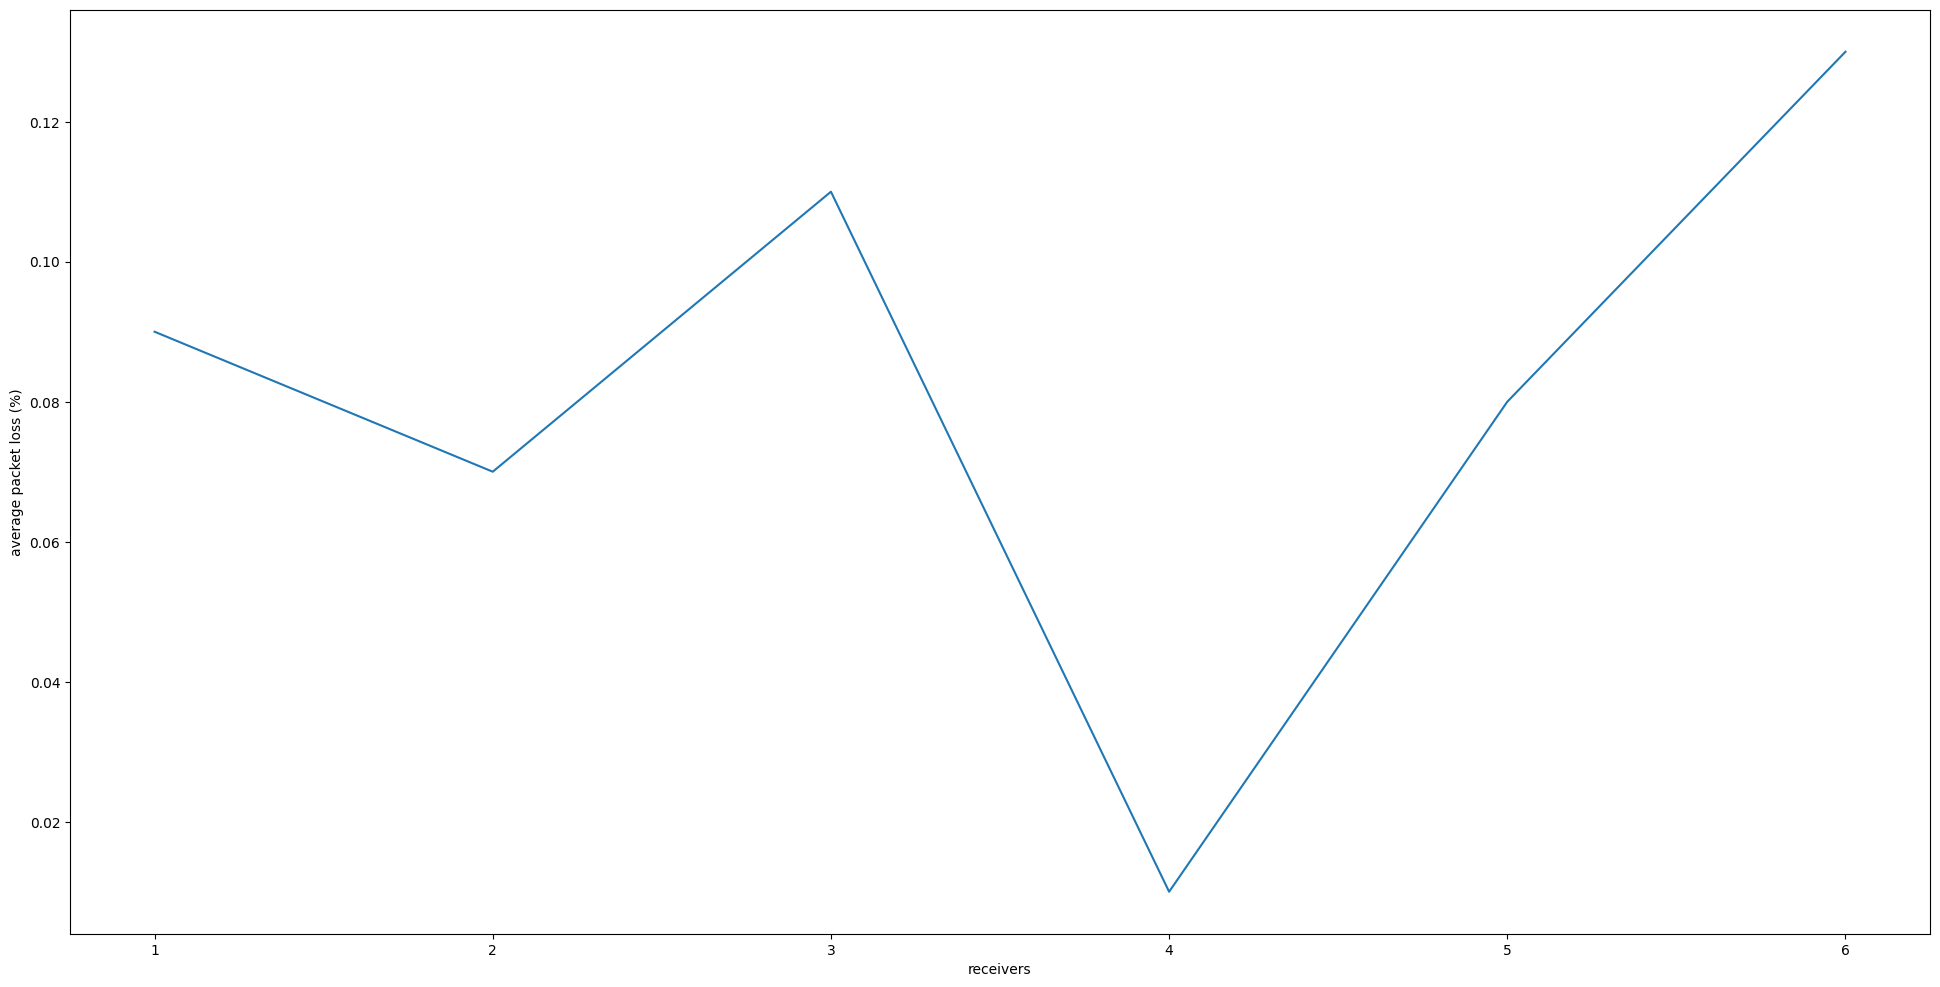

In [21]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
ax.plot([x for x in range(1, nodes_num+1)], pl)

ax.set_xlabel('receivers')
ax.set_ylabel('average packet loss (%)')

plt.show()

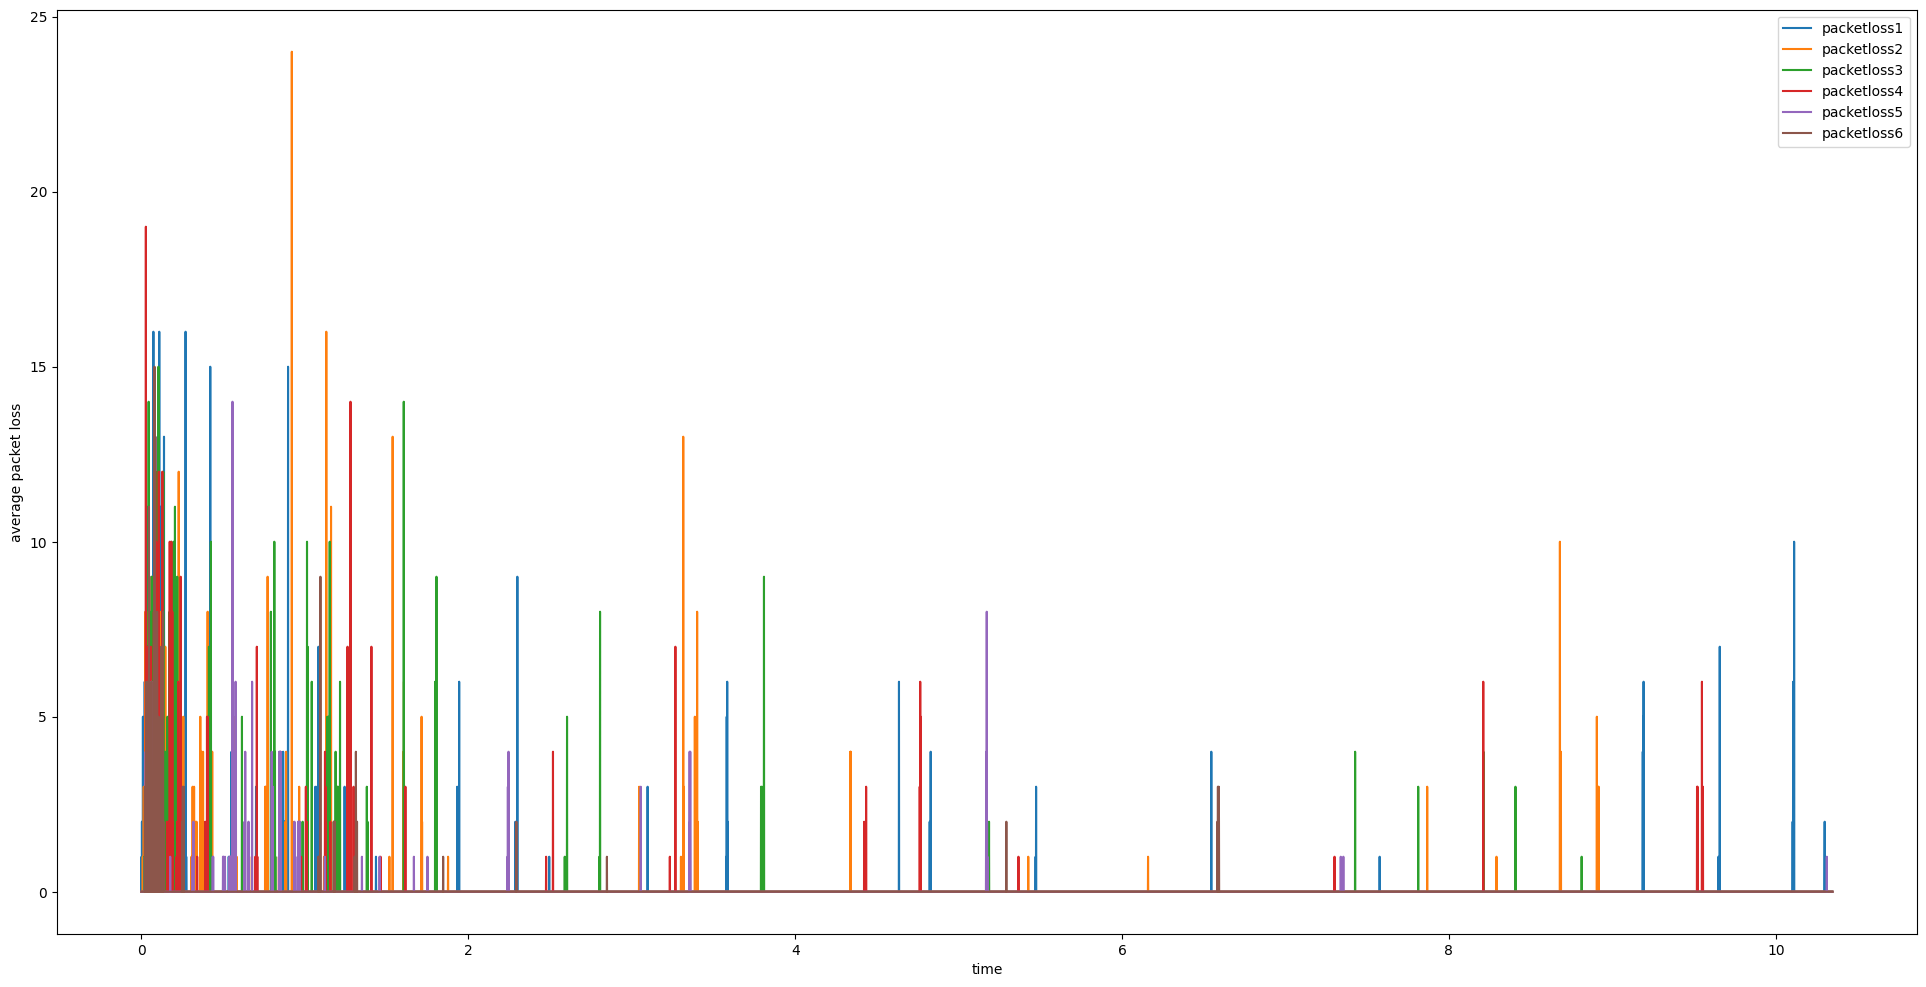

In [22]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
ax.plot(pl_df['time'], pl_df.iloc[:col_len, 1:nodes_num+1])

ax.legend(pl_df.iloc[:col_len, 1:nodes_num+1])
ax.set_xlabel('time')
ax.set_ylabel('average packet loss')

plt.show()

In [93]:
modeling_time = 10
plhist = [0]*modeling_time
plhist
for i in range(1, nodes_num+1):
    for j in range(0, modeling_time):
        if j != 9:
            plhist[j] += len(pl_df.query(f"time >= {j}.0 and time <= {j+1}.0 and packetloss{i} > 0.0"))
        else:
            plhist[j] += len(pl_df.query(f"time >= {j}.0 and packetloss{i} > 0.0"))
print(plhist)
df = pd.DataFrame({
    'time': [x for x in range(1,modeling_time+1)],
    'pkts': plhist
    })
df

[371, 69, 15, 24, 12, 11, 7, 7, 12, 16]


,time,pkts
0,1,371
1,2,69
2,3,15
3,4,24
4,5,12
5,6,11
6,7,7
7,8,7
8,9,12
9,10,16


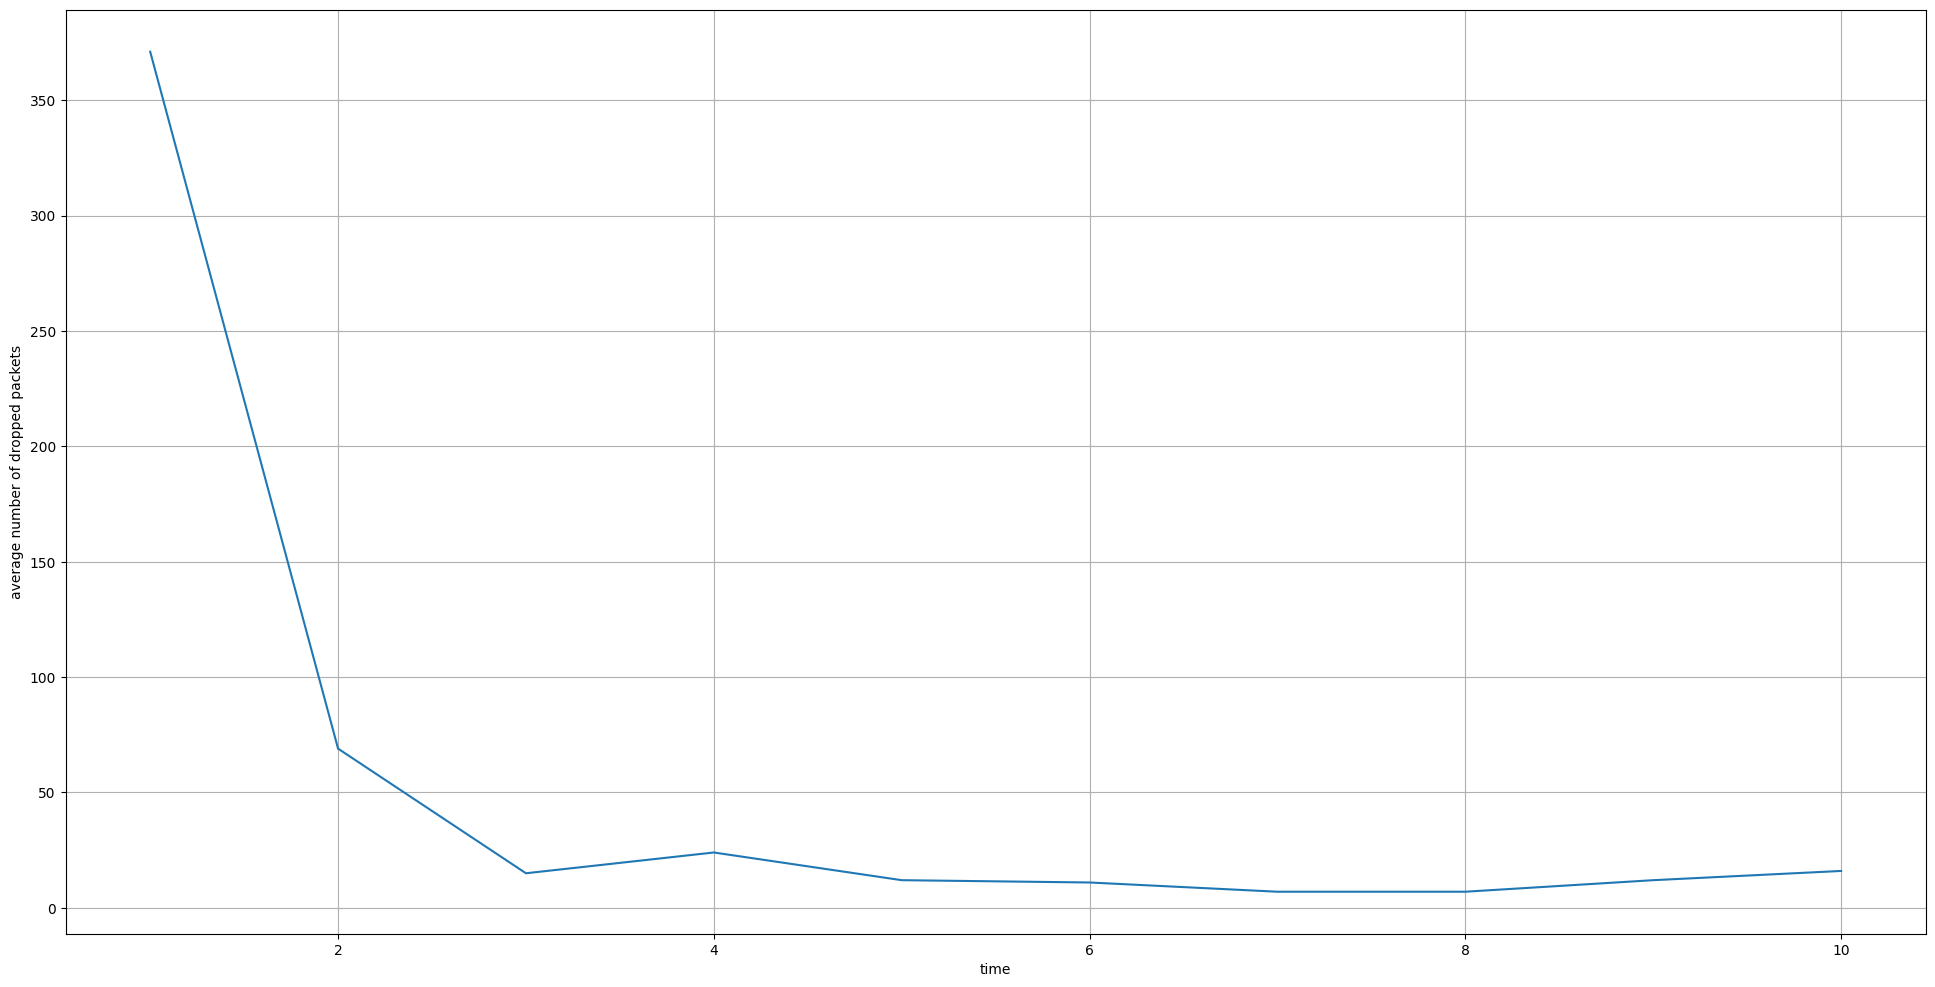

In [94]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
# ax.scatter(df['time'], plhist)
ax.plot(df['time'], plhist)

ax.set_xlabel('time')
ax.grid()
ax.set_ylabel('average number of dropped packets')

plt.show()

10347


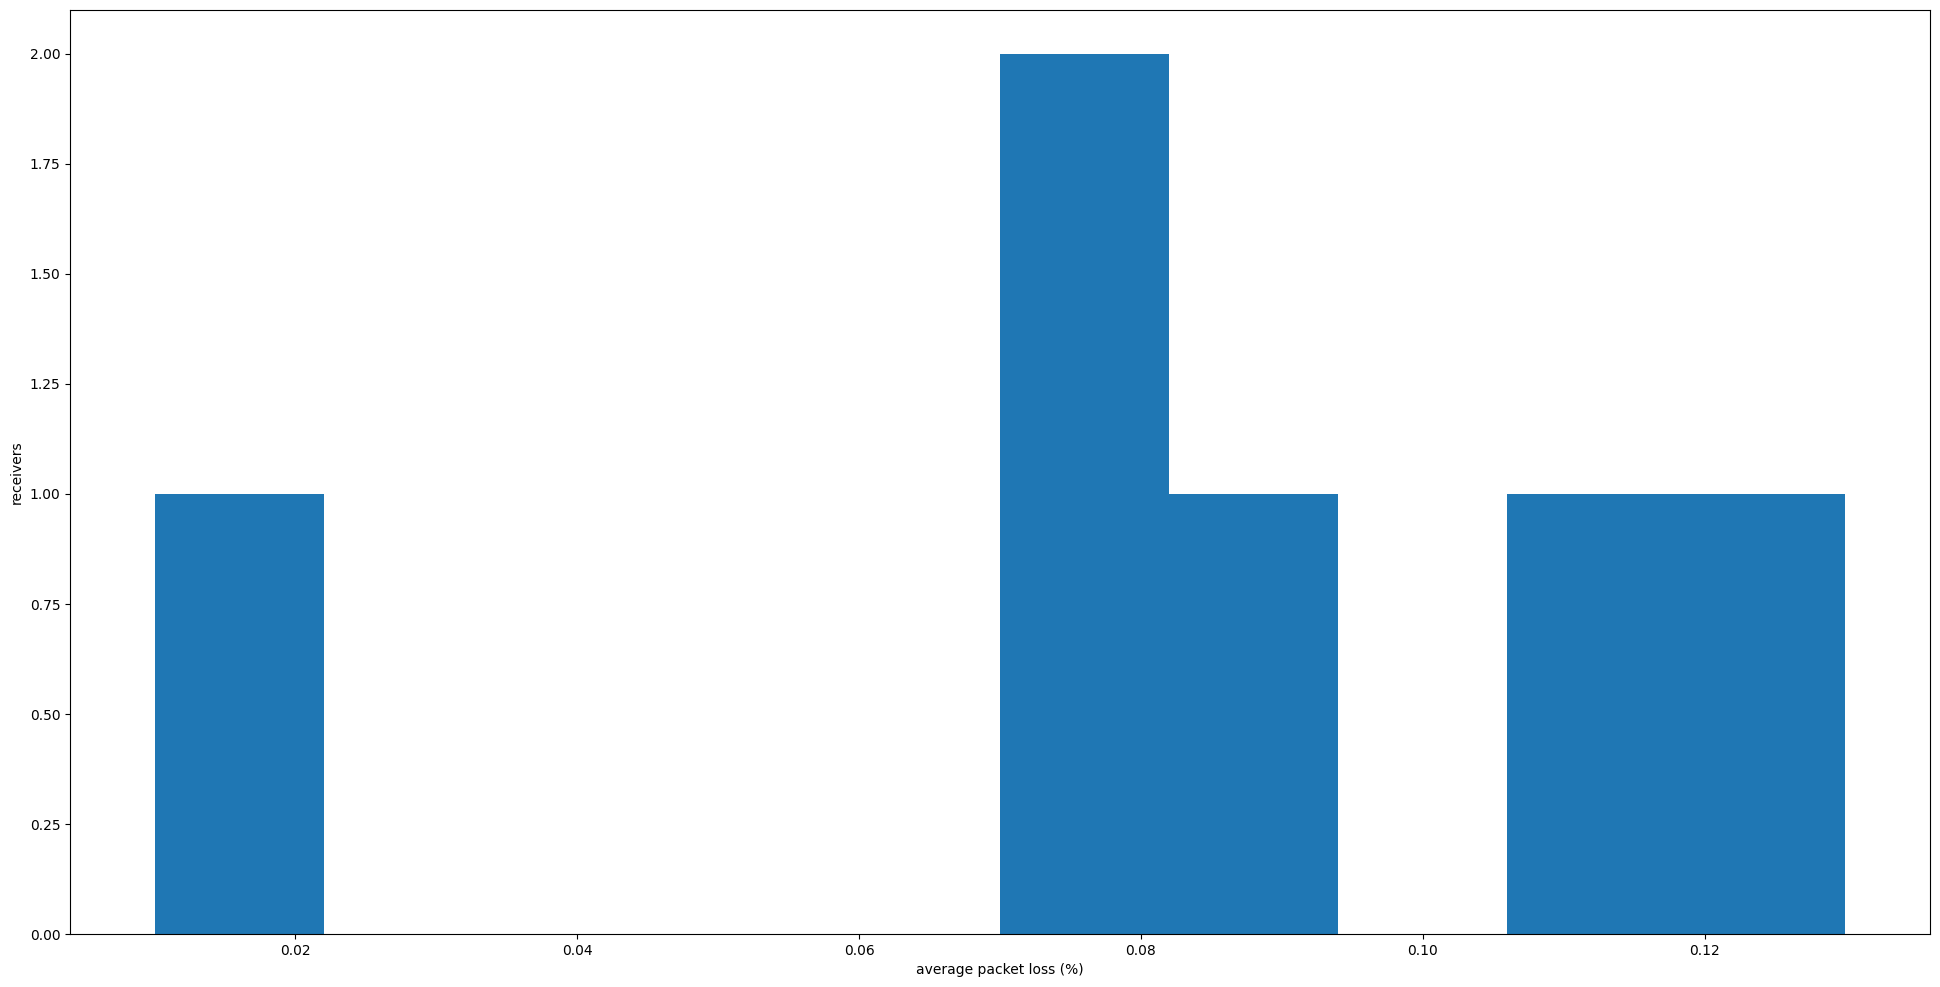

In [28]:
_, ax = plt.subplots(figsize=(24, 12), ncols=1)
print(len(pl_df.iloc[:col_len, 1:nodes_num+1]))
ax.hist(pl)

ax.set_xlabel('average packet loss (%)')
ax.set_ylabel('receivers')

plt.show()

## Average Delay

In [13]:
# creating .dat files with packet losses every PT ms 
for i in range(nodes_num):
    os.system(f'cd {ITG_PATH} && ./ITGDec recv_all_{i+1}.log -c 1 combined_stats{i+1}.dat')

|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/|\-/

limit_output extension: Maximum message size of 10048 exceeded with 180952 characters

In [14]:
from datetime import datetime, timedelta

delays = []
C = 0
S = timedelta()
for i in range(nodes_num):
    c = 0
    sum_delay = timedelta()
    with open(ITG_PATH + f'recv{i+1}.txt', "r") as f:
        for line in f.readlines():
            C += 1
            c += 1
            split_line = line.split()
            tx_time = split_line[7][7:]
            rx_time = split_line[8][7:]
            delay = datetime.strptime(rx_time,"%H:%M:%S.%f") - datetime.strptime(tx_time,"%H:%M:%S.%f") 
            S += delay
            sum_delay += delay
    delays.append(sum_delay / c)

print(delays)
print(S / C)

[datetime.timedelta(microseconds=115540), datetime.timedelta(microseconds=110877), datetime.timedelta(microseconds=112844), datetime.timedelta(microseconds=112963), datetime.timedelta(microseconds=113991), datetime.timedelta(microseconds=113115)]
0:00:00.113201
